In [43]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
import os

from sklearn.cluster import KMeans
from scipy.stats import kruskal
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor

import taxi_driver as td
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
from taxi_driver.taxi_driver import Taxidf

In [6]:
#setting some much needed paths 

dataPath = os.path.join("data")
csvPath  = os.path.join(dataPath,"CSV")
shpPath  = os.path.join(dataPath,"SHP")

outputPath = os.path.join("outputs")
imagePath = os.path.join(outputPath,"images")

In [7]:
df = pd.read_parquet('data/yellow_tripdata_2025-01.parquet')
print(len(df))

3475226


In [258]:
#load the sample
zoneShpPath = os.path.join(shpPath,"taxi_zones.shp")

csv_sample_path = os.path.join("data","yellow_tripdata_2025-01.parquet")
taxi_df=Taxidf(csv_sample_path,taxi_zones_shp_path=zoneShpPath)


<string>:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


In [259]:
taxi_df.compute_taxi_zones()

NameError: name 'taxi_zones' is not defined

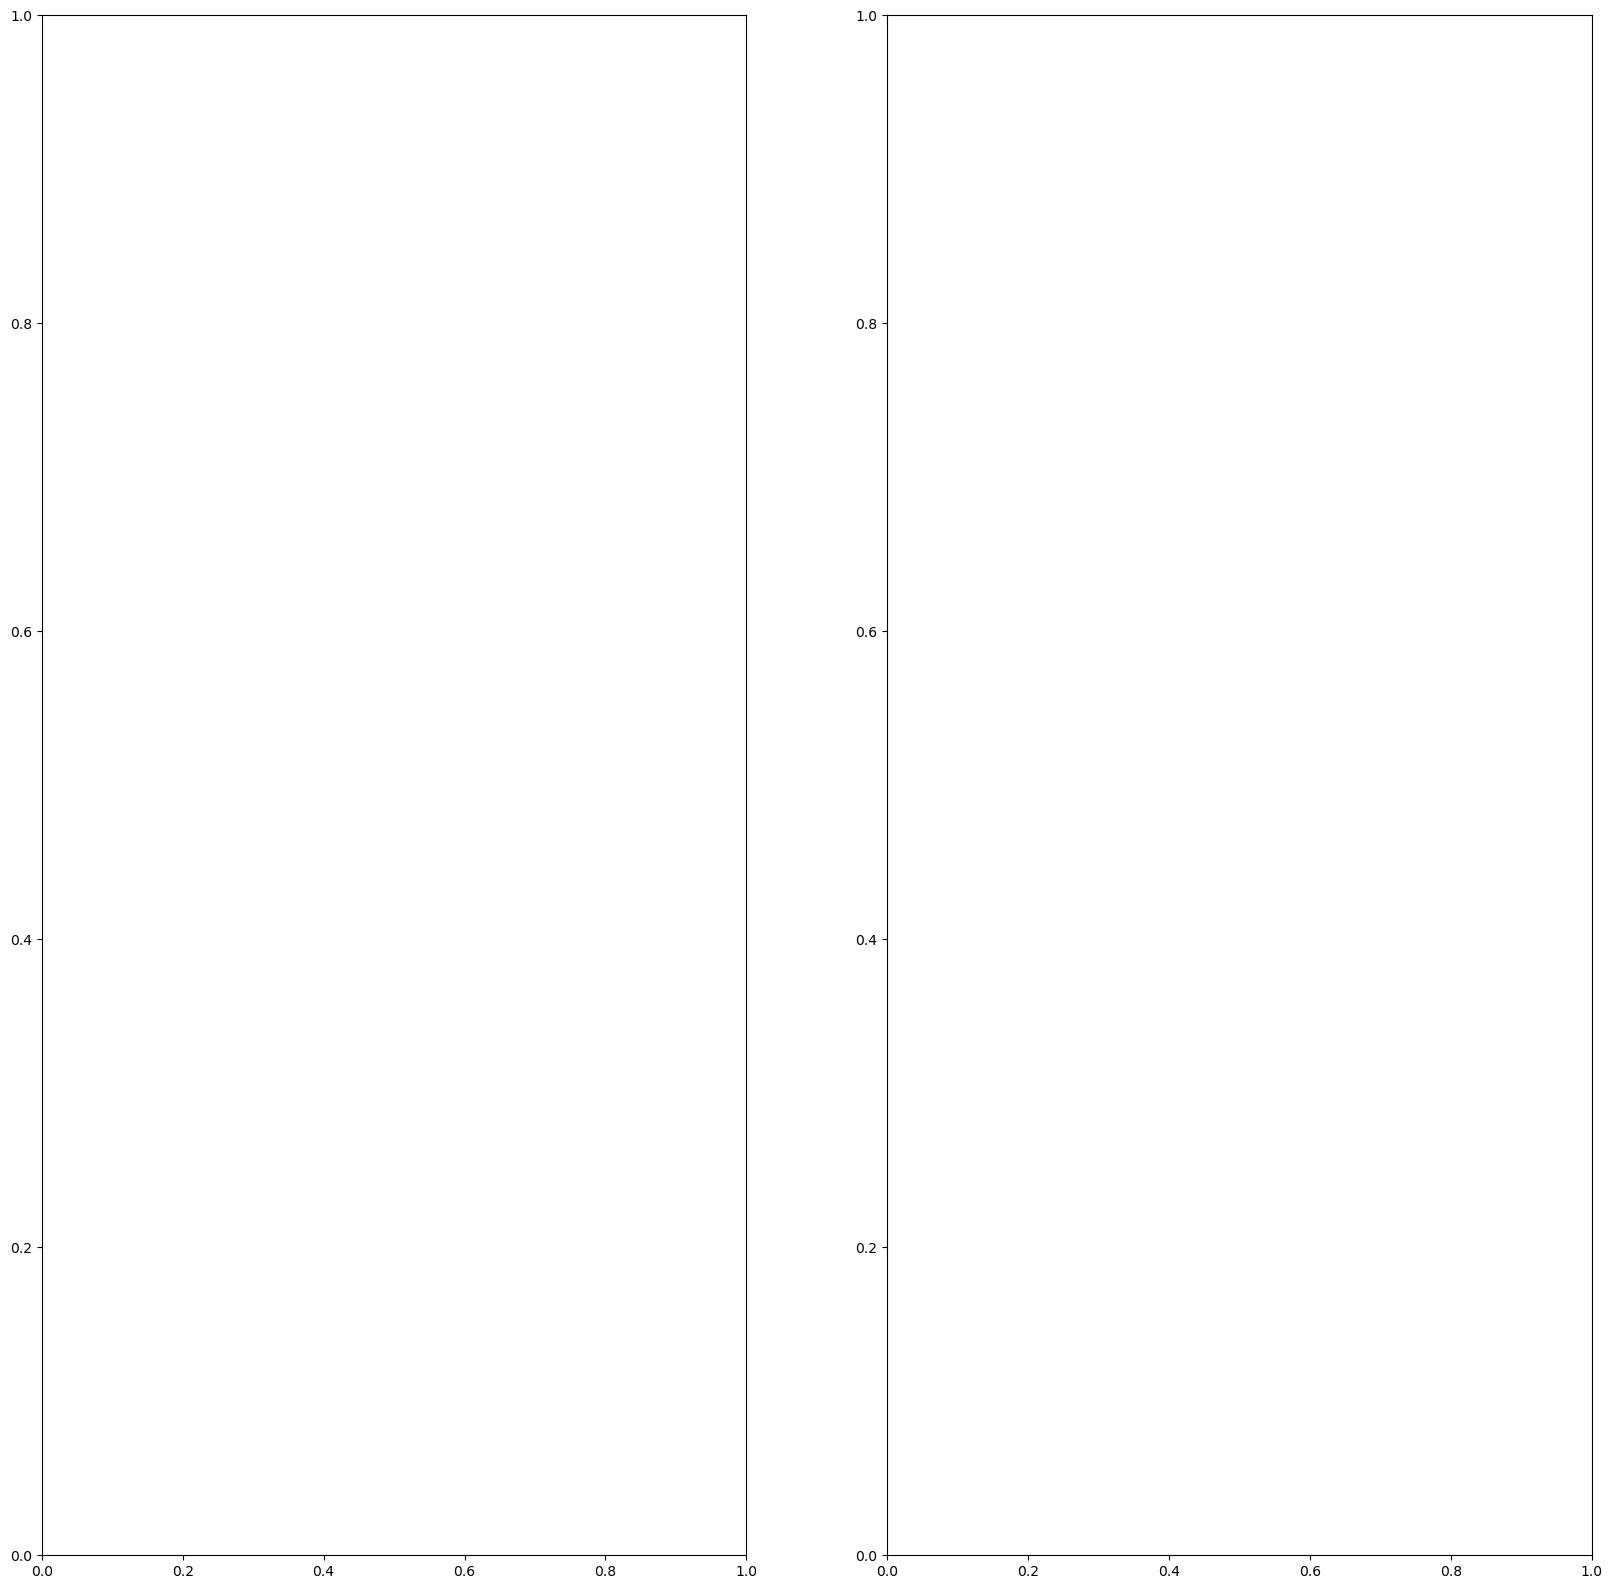

In [260]:
fig,ax = plt.subplots(1,2,figsize=(20,20))
taxi_df.quantile_plotting(axs=ax)


In [194]:
df = taxi_df.taxi_data 
df['tip_percentage']=df['tip_amount']/df['fare_amount']
pivot_table = df.pivot_table(
    values='tip_percentage',
    index='pu_day',  # 0 = Monday, 6 = Sunday
    columns='pu_hour',
    aggfunc='std'
)

pivot_table

pu_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
pu_day,,,,,,,,,,,,,,,,,,,,,
0,NaN,0.216220,0.246719,0.183073,0.147730,0.522951,0.163037,0.161517,0.178463,0.161146,...,0.203757,0.282203,0.174337,7.308872,14.554143,0.251723,0.167140,0.278962,0.177340,0.180463
1,0.327842,0.405839,0.196650,0.178884,0.258019,0.175724,0.199278,0.155822,0.224908,0.168044,...,0.184667,0.151307,0.190993,0.214691,0.187312,0.172176,0.166284,0.180027,0.173376,18.883093
2,0.183248,0.242203,0.400353,0.279517,0.365111,0.189137,NaN,0.179555,0.156463,0.158901,...,11.225779,0.204244,0.166310,0.197982,0.191563,0.239613,0.169516,0.169821,0.177469,NaN
3,0.170329,0.283017,1.119216,0.219510,0.465338,0.205079,0.235156,0.157147,0.152440,0.191439,...,0.571382,0.185881,0.182113,0.176842,4.777827,0.304277,0.336776,0.233008,0.196999,0.220239
4,0.220526,0.275343,0.219151,0.753688,0.196238,0.172730,0.729092,0.155359,0.156231,0.172201,...,NaN,0.155869,0.198429,0.173294,0.179616,0.175032,0.166398,0.221787,0.205651,0.200340
5,0.208410,0.283997,0.197152,0.310936,0.295823,0.219990,0.161498,0.408267,0.286464,0.243538,...,0.157252,23.551711,0.213287,0.167978,0.210606,0.872027,0.173337,0.184997,0.171155,0.205832
6,0.347504,0.339954,0.360680,1.469913,0.213750,0.334039,0.150105,0.162859,NaN,0.285948,...,0.198292,0.247364,0.160325,0.173540,0.193519,0.263151,0.212735,0.208756,0.188921,0.327792


In [261]:
taxi_df.taxi_data.replace([np.inf, -np.inf], np.nan, inplace=True)


/tmp/ipykernel_17723/1107031205.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  taxi_df.taxi_data.replace([np.inf, -np.inf], np.nan, inplace=True)


In [262]:
taxi_df.taxi_data=taxi_df.taxi_data.dropna()

In [247]:
df = taxi_df.taxi_data
sliceDf=df.query('0<tip_percentage<2.0')

scipy.stats.skewtest(sliceDf['tip_percentage']).statistic


800.4619353742893

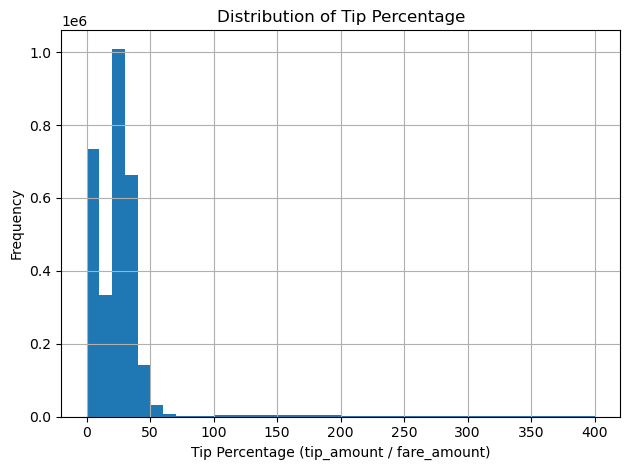

In [254]:
plt.hist(df['tip_percentage']*100,bins=[0,10,20,30,40,50,60,70,80,90,100,200,300,400])
plt.title("Tip percentage distribution")
plt.title('Distribution of Tip Percentage')
plt.xlabel('Tip Percentage (tip_amount / fare_amount)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

In [276]:
df = taxi_df.taxi_data
sliceDf=df.query('0<tip_percentage<1.0')
scipy.stats.skewtest(sliceDf['tip_percentage'])

SkewtestResult(statistic=281.803439289633, pvalue=0.0)

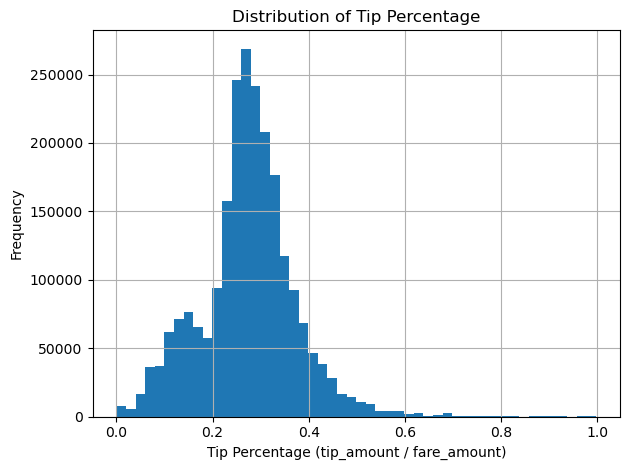

In [287]:
plt.hist(sliceDf['tip_percentage'],bins=50)
plt.title("Tip percentage distribution")
plt.title('Distribution of Tip Percentage')
plt.xlabel('Tip Percentage (tip_amount / fare_amount)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

In [286]:
scipy.stats.skewtest(sliceDf['tip_percentage'])

SkewtestResult(statistic=281.803439289633, pvalue=0.0)

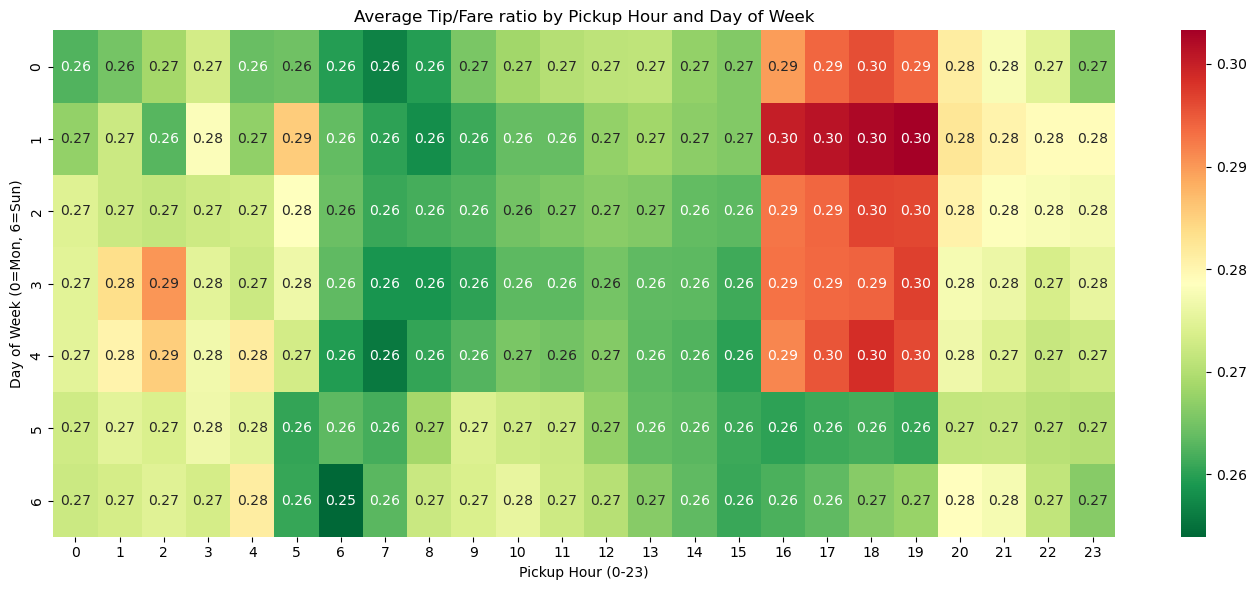

In [275]:
import matplotlib.pyplot as plt
import seaborn as sns

def heatmap_tip_by_time(df):
    """
    Create a heatmap of average tip amount by pickup hour and pickup weekday.
    
    Parameters:
        df (pd.DataFrame): Preprocessed dataframe with 'tip_amount', 'pu_hour', and 'pu_day'
    """
    # Ensure required columns are present
    if not {'tip_amount', 'pu_hour', 'pu_day'}.issubset(df.columns):
        raise ValueError("DataFrame must contain 'tip_amount', 'pu_hour', and 'pu_day' columns.")


df = taxi_df.taxi_data 
df['tip_percentage']=df['tip_amount']/df['fare_amount']
df = df.query('tip_percentage>0 and tip_percentage<1.0')
# Aggregate tip amount
pivot_table = df.pivot_table(
    values='tip_percentage',
    index='pu_day',  # 0 = Monday, 6 = Sunday
    columns='pu_hour',
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="RdYlGn_r")
plt.title("Average Tip/Fare ratio by Pickup Hour and Day of Week")
plt.xlabel("Pickup Hour (0-23)")
plt.ylabel("Day of Week (0=Mon, 6=Sun)")
plt.tight_layout()
plt.show()

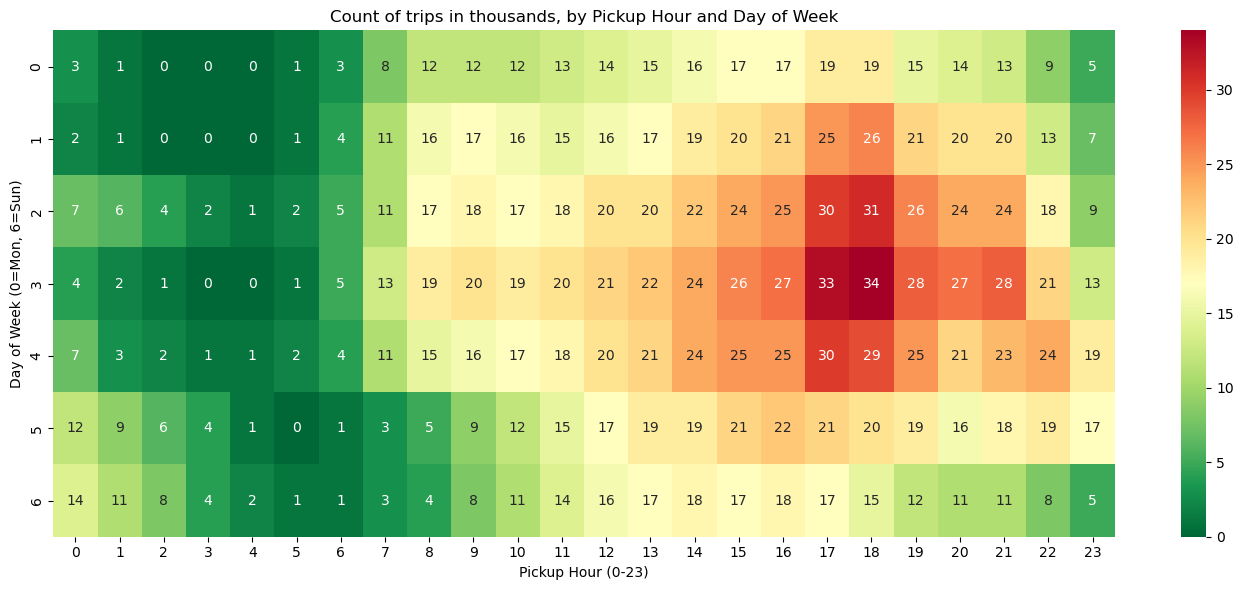

In [82]:
pivot_table = df.pivot_table(
    values='VendorID',
    index='pu_day',  # 0 = Monday, 6 = Sunday
    columns='pu_hour',
    aggfunc='count'
)


# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table//1000, annot=True, fmt=".0f", cmap="RdYlGn_r")
plt.title("Count of trips in thousands, by Pickup Hour and Day of Week")
plt.xlabel("Pickup Hour (0-23)")
plt.ylabel("Day of Week (0=Mon, 6=Sun)")
plt.tight_layout()

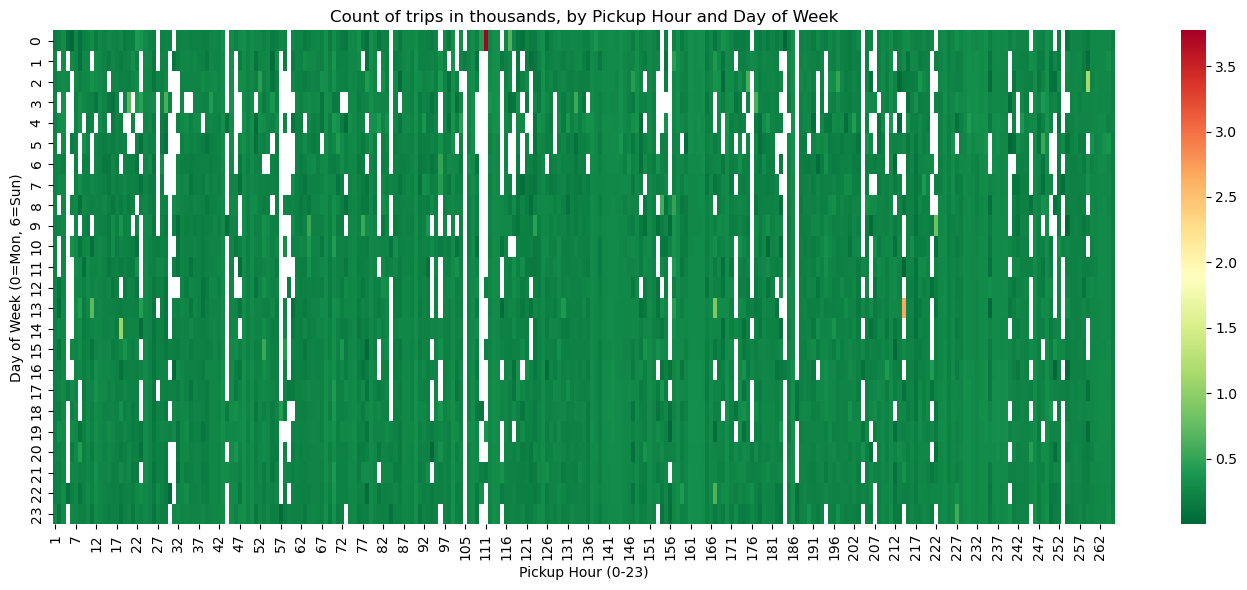

In [175]:
pivot_table = df.pivot_table(
    values='tip_percentage',
    index='pu_hour',  # 0 = Monday, 6 = Sunday
    columns='DOLocationID',
    aggfunc='mean'
)


# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, annot=False, fmt=".0f", cmap="RdYlGn_r")
plt.title("Count of trips in thousands, by Pickup Hour and Day of Week")
plt.xlabel("Pickup Hour (0-23)")
plt.ylabel("Day of Week (0=Mon, 6=Sun)")
plt.tight_layout()

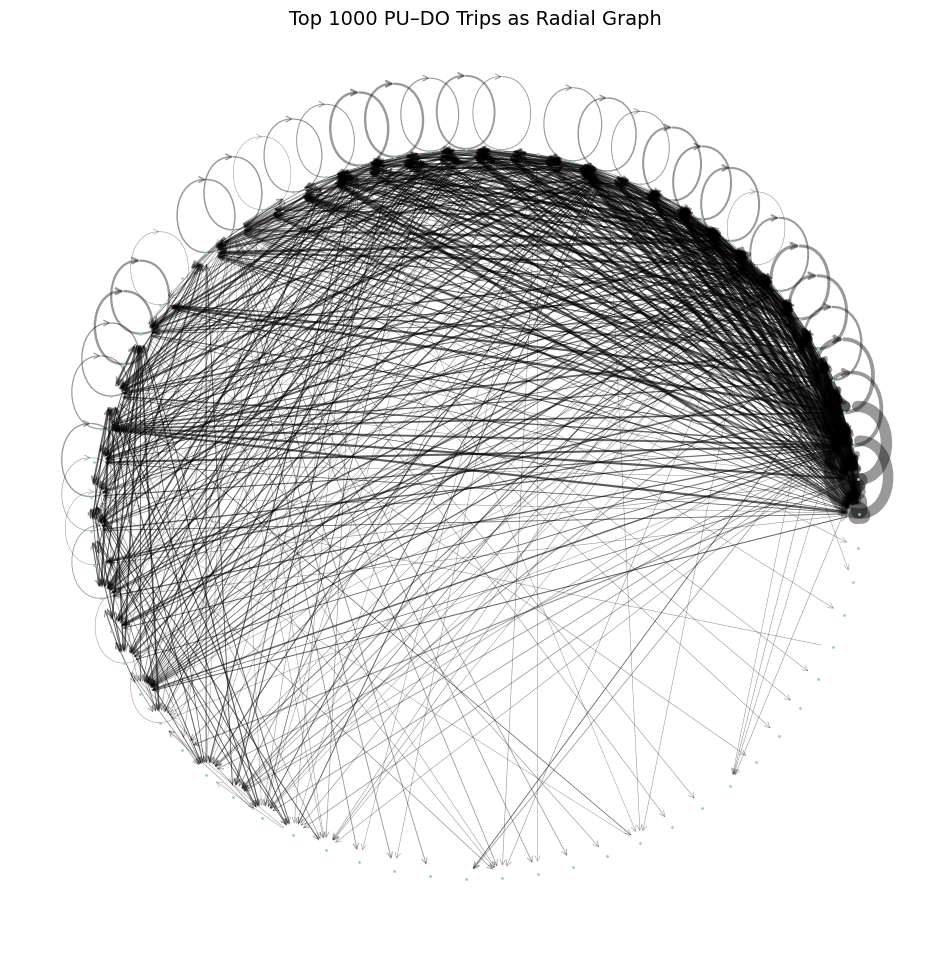

In [180]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_radial_pudo_graph(df, top_n=30):
    """
    Plot a circular (radial) graph of the top PU–DO trip pairs by frequency.
    
    Parameters:
        df (pd.DataFrame): DataFrame with 'PULocationID' and 'DOLocationID'
        top_n (int): Number of top PU–DO pairs to show
    """
    # Compute top PU–DO pairs
    edge_counts = (
        df.groupby(['PULocationID', 'DOLocationID'])
        .size()
        .reset_index(name='trip_count')
        .sort_values(by='trip_count', ascending=False)
        .head(top_n)
    )

    G = nx.DiGraph()
    
    # Add edges with weights
    for _, row in edge_counts.iterrows():
        G.add_edge(int(row['PULocationID']), int(row['DOLocationID']), weight=row['trip_count'])

    # Circular layout
    pos = nx.circular_layout(G)

    plt.figure(figsize=(12, 12))
    nx.draw_networkx_nodes(G, pos, node_size=1, node_color='skyblue')
    # nx.draw_networkx_labels(G, pos, font_size=10)
    
    # Draw edges with weight-based thickness
    edges = G.edges(data=True)
    weights = [d['weight'] for (_, _, d) in edges]
    weights_norm = [w / max(weights) * 12 for w in weights]  # Normalize for thickness
    
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=weights_norm, arrows=True, arrowstyle='->',alpha=0.4)
    plt.title(f"Top {top_n} PU–DO Trips as Radial Graph", fontsize=14)
    plt.axis('off')
    plt.show()
    
    return edge_counts,G


edge_counts,G = plot_radial_pudo_graph(df, top_n=1000)


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
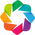

:Chord   [PULocationID,DOLocationID]   (total_tip)

In [182]:
import pandas as pd
import holoviews as hv
hv.extension('bokeh')

# 1. Aggregate tip_amount (or count) for each PU–DO pair
route_counts = (
    df.groupby(['PULocationID', 'DOLocationID'])['tip_amount']
    .mean()
    .reset_index()
    .rename(columns={'tip_amount': 'total_tip'})
)

# 2. Filter top N routes if needed
top_routes = route_counts.sort_values('total_tip', ascending=False).head(100)

# 3. Prepare nodes (you can also join with zone names here)
unique_nodes = pd.DataFrame({
    'LocationID': pd.unique(top_routes[['PULocationID', 'DOLocationID']].values.ravel())
})

nodes = hv.Dataset(unique_nodes, 'LocationID')

# 4. Create the chord diagram
chord = hv.Chord((top_routes, nodes)).select(value=(1, None))
chord.opts(
    opts.Chord(
        cmap='Category20',
        edge_color='total_tip',
        labels='LocationID',
        node_color='LocationID',
        edge_cmap='RdYlGn',
        edge_line_width=1,
        width=800,
        height=800,
        title="PU–DO Chord Diagram by Total Tip Amount"
    )
)


In [159]:
route_counts

,PULocationID,DOLocationID,tip_amount
0,1,1,197
1,1,6,2
2,1,33,1
3,1,68,1
4,1,89,1
...,...,...,...
13583,265,246,4
13584,265,261,1
13585,265,263,2
13586,265,264,5


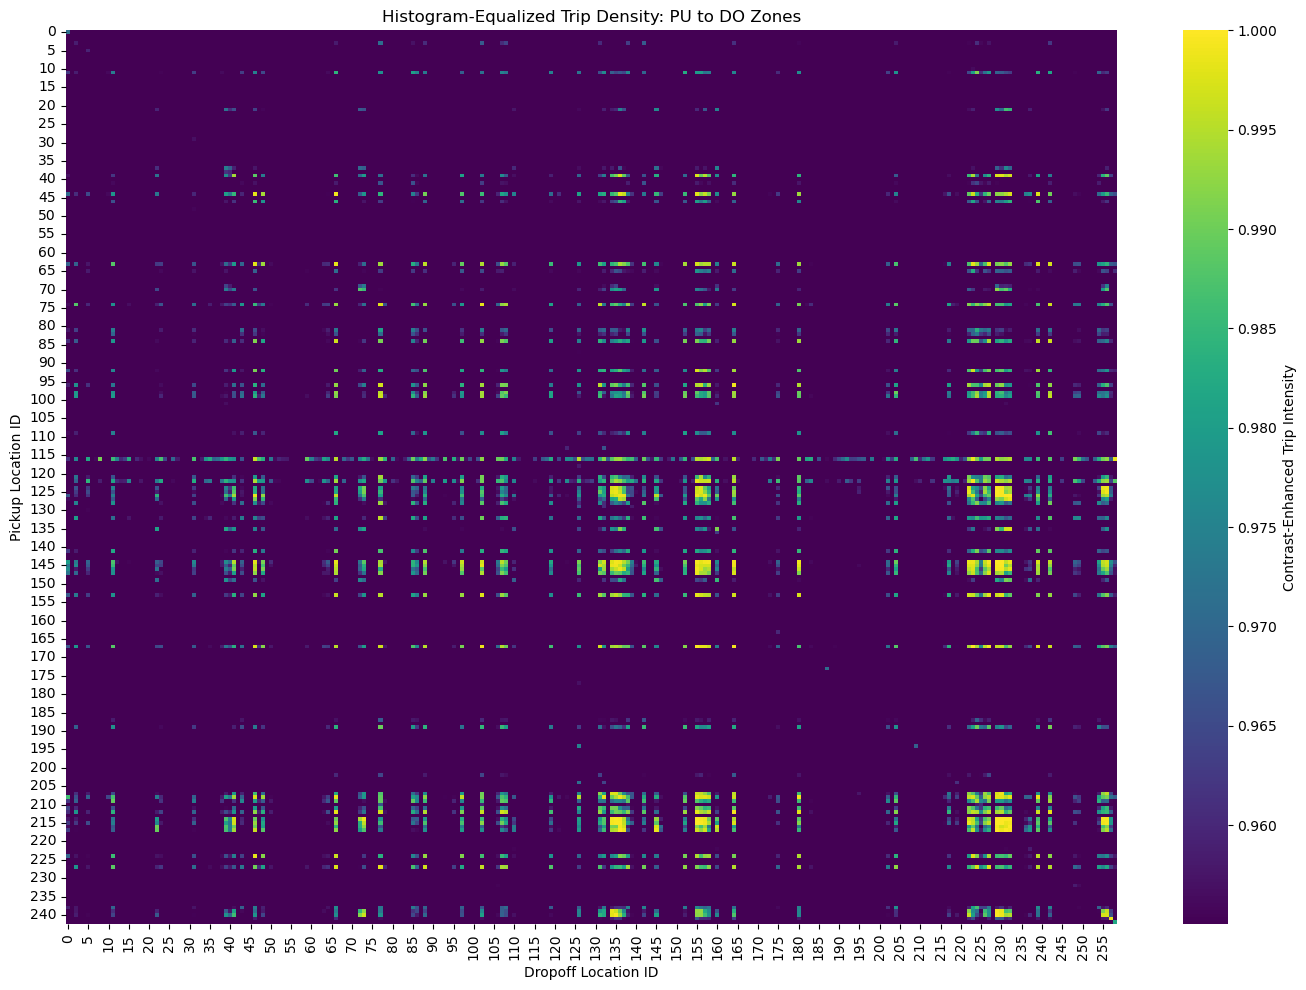

In [90]:
from skimage import exposure

trip_array = trip_matrix.values.astype(float)
trip_eq = exposure.equalize_hist(trip_array)

plt.figure(figsize=(14, 10))
sns.heatmap(trip_eq, cmap="viridis", cbar_kws={'label': 'Contrast-Enhanced Trip Intensity'})
plt.title("Histogram-Equalized Trip Density: PU to DO Zones")
plt.xlabel("Dropoff Location ID")
plt.ylabel("Pickup Location ID")
plt.tight_layout()
plt.show()

In [42]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,pu_day,pu_hour,do_day,do_hour,pu_date,do_date,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,...,18.00,NaN,NaN,NaN,NaN,NaN,NaN,2.5,0.0,0.00
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,...,12.12,NaN,NaN,NaN,NaN,NaN,NaN,2.5,0.0,0.00
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,...,12.10,NaN,NaN,NaN,NaN,NaN,NaN,2.5,0.0,0.00
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,...,9.70,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,...,8.30,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3475221,2,2025-01-31 23:01:48,2025-01-31 23:16:29,NaN,3.35,NaN,None,79,237,0,...,20.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.75
3475222,2,2025-01-31 23:50:29,2025-02-01 00:17:27,NaN,8.73,NaN,None,161,116,0,...,32.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.75
3475223,2,2025-01-31 23:26:59,2025-01-31 23:43:01,NaN,2.64,NaN,None,144,246,0,...,19.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.75
3475224,2,2025-01-31 23:14:34,2025-01-31 23:34:52,NaN,3.16,NaN,None,142,107,0,...,22.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.75


In [38]:
df=taxi_df.taxi_data

#will keep only the payment checks
df = df[df['payment_type']==1]

# I will create a sample of only the non_negative
df= df[df['tip_amount']>=0]
df= df[df['trip_distance']>=0]

#controlling the value between >0 and 2000$
df=sample_df.loc[(df['fare_amount']>0) ]
df['dollar_per_mile']=df['fare_amount']/df['trip_distance']
df['tip_to_fare']=df['tip_amount']/df['fare_amount']
df['duration_s']=(df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']).apply(lambda x:x.seconds)
df['speed_kpi']=df['trip_distance']/df['duration_s']

df = df[df['duration_s']>0]

In [41]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'pu_day', 'pu_hour', 'do_day', 'do_hour', 'pu_date',
       'do_date', 'congestion_surcharge', 'Airport_fee', 'cbd_congestion_fee',
       'pu_month', 'do_month', 'is_weekend', 'is_night', 'time_cluster',
       'dollar_per_mile', 'tip_to_fare', 'duration_s', 'speed_kpi'],
      dtype='object')

In [61]:
df[numerical_cols]

,fare_amount,trip_distance,duration_s,Airport_fee,VendorID,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID
0,10.0,1.60,501,0.0,1,1.0,N,229,237
1,5.1,0.50,153,0.0,1,1.0,N,236,237
2,5.1,0.60,117,0.0,1,1.0,N,141,141
6,4.4,0.40,88,0.0,1,1.0,N,170,170
7,12.1,1.60,744,0.0,1,1.0,N,234,148
...,...,...,...,...,...,...,...,...,...
2935070,14.9,2.91,797,0.0,2,1.0,N,107,141
2935071,7.2,0.96,290,0.0,2,1.0,N,141,236
2935074,14.2,1.96,810,0.0,2,1.0,N,142,164
2935075,7.2,0.89,331,0.0,2,1.0,N,230,142


In [79]:
numerical_cols=['fare_amount','trip_distance','duration_s','Airport_fee']


categorical_cols = [
    'VendorID', 'RatecodeID', 'store_and_fwd_flag',
    'PULocationID', 'DOLocationID', 'pu_day', 'pu_hour','do_month', 'is_weekend', 'is_night'
]

In [80]:
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])

numerical_transformer = SimpleImputer(strategy='mean')

preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_cols),
    ('num', numerical_transformer, numerical_cols)
])

In [81]:
X=df[numerical_cols+categorical_cols]
y=df['tip_amount']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [82]:
pipe_hist = Pipeline([
    ('preprocess', preprocessor),
    ('model', HistGradientBoostingRegressor(random_state=42))
])

pipe_hist.fit(X_train, y_train)
y_pred_hist = pipe_hist.predict(X_test)

In [83]:
pipe_xgb = Pipeline([
    ('preprocess', preprocessor),
    ('model', XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        random_state=42,
        tree_method='hist'
    ))
])

pipe_xgb.fit(X_train, y_train)
y_pred_xgb = pipe_xgb.predict(X_test)

In [84]:
def evaluate(y_true, y_pred, name='Model'):
    print(f"\n{name} Evaluation:")
    print(f"MAE:  {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R²:   {r2_score(y_true, y_pred):.4f}")
    
evaluate(y_test, y_pred_hist, "HistGradientBoosting")
evaluate(y_test, y_pred_xgb, "XGBoost")


HistGradientBoosting Evaluation:
MAE:  1.22
RMSE: 2.45
R²:   0.6061

XGBoost Evaluation:
MAE:  1.22
RMSE: 2.52
R²:   0.5837


In [92]:
import optuna
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
from scipy.stats import zscore

# Filter: remove outliers in numeric columns
outlier_cols = ["trip_distance", "duration_s", "speed_kpi", "tip_to_fare"]
for col in outlier_cols:
    df = df[(np.abs(zscore(df[col].fillna(0))) < 3)]

# ---------------------
# Feature Engineering
# ---------------------
df["log_tip"] = np.log1p(df["tip_amount"])
df["distance_hour"] = df["trip_distance"] * df["pu_hour"]
df["speed_congestion"] = df["speed_kpi"] * df["congestion_surcharge"].fillna(0)

# Features and target
features = [
    "passenger_count", "trip_distance", "RatecodeID", "payment_type",
    "PULocationID", "DOLocationID", "pu_hour", "pu_day", "pu_month",
    "dollar_per_mile", "duration_s", "speed_kpi",
    "distance_hour", "speed_congestion"
]
target = "log_tip"

X = df[features]
y = df[target]

# ---------------------
# Preprocessing
# ---------------------
categorical_cols = ["RatecodeID", "payment_type", "PULocationID", "DOLocationID"]
numerical_cols = list(set(features) - set(categorical_cols))

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols)
], remainder='passthrough')

# ---------------------
# Modeling Pipeline
# ---------------------
def objective(trial):
    params = {
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "max_iter": trial.suggest_int("max_iter", 100, 500),
        "max_leaf_nodes": trial.suggest_int("max_leaf_nodes", 15, 63),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "l2_regularization": trial.suggest_float("l2_regularization", 0.0, 1.0),
    }

    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", HistGradientBoostingRegressor(random_state=42, **params))
    ])

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)

    rmse = mean_squared_error(y_val, y_pred)
    return rmse

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

# ---------------------
# Evaluate Best Model
# ---------------------
best_params = study.best_params

final_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", HistGradientBoostingRegressor(random_state=42, **best_params))
])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
final_pipeline.fit(X_train, y_train)
y_pred = final_pipeline.predict(X_val)

# Inverse transform log prediction
y_val_orig = np.expm1(y_val)
y_pred_orig = np.expm1(y_pred)

print("Final Evaluation:")
print("MAE:", mean_absolute_error(y_val_orig, y_pred_orig))
print("RMSE:", mean_squared_error(y_val_orig, y_pred_orig, squared=False))
print("R2:", r2_score(y_val_orig, y_pred_orig))


[I 2025-05-26 21:51:41,893] A new study created in memory with name: no-name-de8ca47d-a7bc-4e7a-ae87-acc5f3fcfa2d
/home/itoumpalidis/anaconda3/envs/algae/lib/python3.12/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [57]:
from sklearn.metrics import silhouette_score
k_range = range(4, 11)
silhouette_scores = []
for k in k_range:
    print(k)
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = km.fit_predict(df[['pu_hour', 'pu_day']])
    score = silhouette_score(df[['pu_hour', 'pu_day']], labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(k_range, silhouette_scores, marker='o', color='purple')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()


4


KeyboardInterrupt: 

Kruskal-Wallis H-test statistic = 19285.73
P-value = 0.0000
✅ Statistically significant difference in tip amount across time clusters.


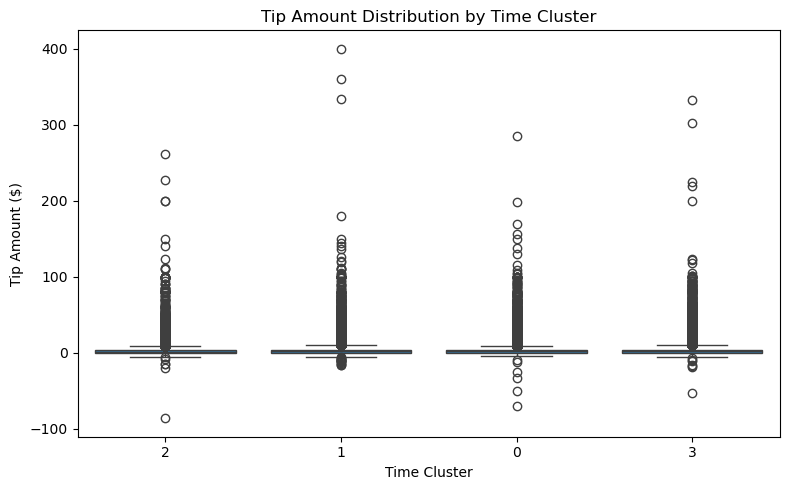

In [16]:
# --- Step 1: Create temporal features
df['is_weekend'] = df['pu_day'].isin([5, 6]).astype(int)
df['is_night'] = df['pu_hour'].apply(lambda h: 1 if h < 6 or h > 21 else 0)

# --- Step 2: Apply KMeans clustering on pu_hour and pu_day
temporal_features = df[['pu_hour', 'pu_day']]
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
df['time_cluster'] = kmeans.fit_predict(temporal_features)
df['time_cluster'] = df['time_cluster'].astype(str)  # treat as categorical for modeling

# --- Step 3: Kruskal-Wallis test (non-parametric ANOVA)
groups = [g['tip_amount'].values for _, g in df.groupby('time_cluster')]
stat, p_value = kruskal(*groups)

print(f"Kruskal-Wallis H-test statistic = {stat:.2f}")
print(f"P-value = {p_value:.4f}")
if p_value < 0.05:
    print("✅ Statistically significant difference in tip amount across time clusters.")
else:
    print("⚠️ No significant difference in tip amount across time clusters.")

# --- Step 4 (Optional): Visualize tip_amount by time_cluster
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='time_cluster', y='tip_amount')
plt.title('Tip Amount Distribution by Time Cluster')
plt.xlabel('Time Cluster')
plt.ylabel('Tip Amount ($)')
plt.tight_layout()
plt.show()